In [2]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def simulate_game(numbers):
    step = 0
    while len(numbers) > 1:
        step += 1
        a, b = random.sample(list(numbers), 2)
        numbers.remove(a)
        numbers.remove(b)
        diff = abs(a) -abs( b)
        numbers.append(diff)
        
        #print(f"Step {step}: Chosen numbers are {a} and {b}. Difference is {diff}. Current list: {numbers}")
    
    return numbers[0]

In [3]:
def simulate_n_games(n, num_range):
    results = []
    for _ in range(n):
        numbers = list(range(1, num_range + 1))
        result = simulate_game(numbers)
        results.append(result)
    return results

In [4]:
results_2024_1 = simulate_n_games(3000, 2024)

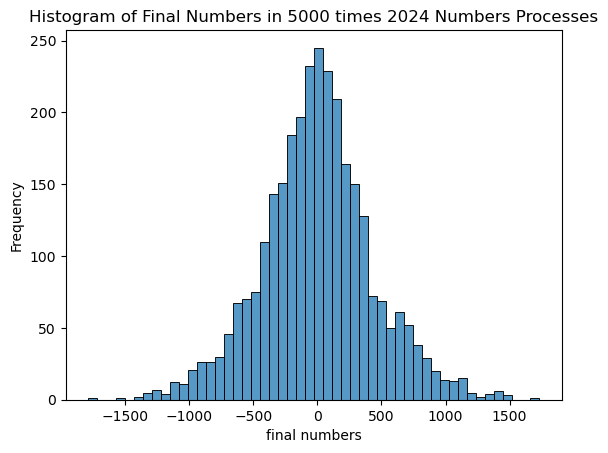

In [5]:
sns.histplot(results_2024_1)
plt.xlabel('final numbers')
plt.title('Histogram of Final Numbers in 5000 times 2024 Numbers Processes')
plt.ylabel('Frequency')
plt.show()

In [8]:
def contains_odd_number(results):
    for number in results:
        if number % 2 != 0:  # If the number is odd
            return True  # Return True as soon as an odd number is found
    return False  # Return False if no odd numbers are found

In [7]:
contains_odd_number(results_2024_1)

False

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr


data_abs = np.abs(results_2024_1)


data_freq = pd.value_counts(data_abs).sort_index()


corr, p_value = spearmanr(data_freq.index, data_freq.values)

print(f"S.R.C.C: {corr}, P value: {p_value}")


S.R.C.C: -0.8791209730616699, P value: 3.7269013283399614e-179


In [14]:
results_2024_2 = simulate_n_games(5000, 2024)

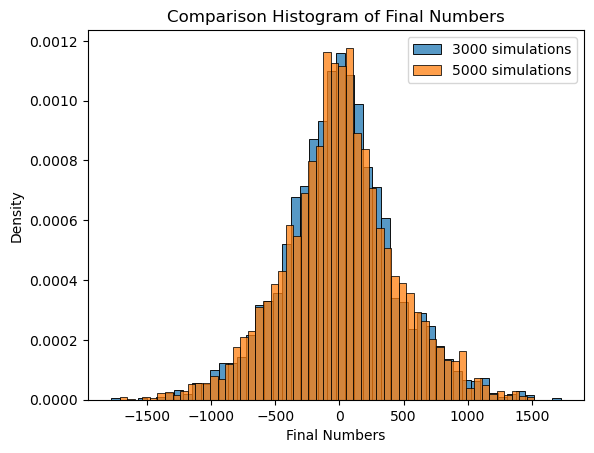

In [16]:
sns.histplot(data=results_2024_1, kde=False, stat="density", element="bars", label="3000 simulations")
sns.histplot(data=results_2024_2, kde=False, stat="density", element="bars", label="5000 simulations")

plt.xlabel('Final Numbers')
plt.title('Comparison Histogram of Final Numbers')
plt.ylabel('Density')
plt.legend()
plt.show()

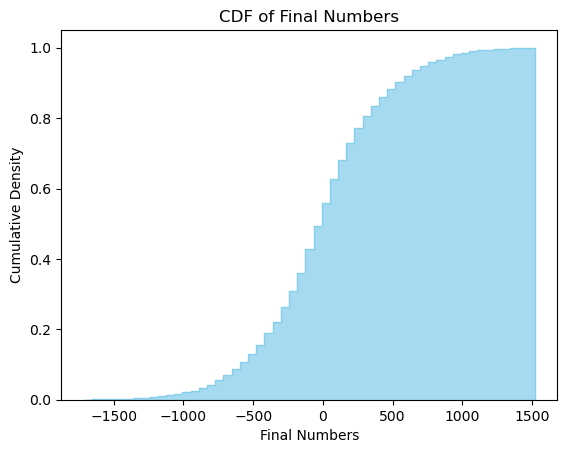

In [23]:
kwargs = {'cumulative': True}

sns.histplot(results_2024_2, stat="density", cumulative=True, fill=True, element="step", color="skyblue")
plt.xlabel('Final Numbers')
plt.title('CDF of Final Numbers')
plt.ylabel('Cumulative Density')

plt.show()

C:\Users\LuYi\AppData\Local\Temp\ipykernel_16512\3187809258.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results_2024_1,norm_hist=True,kde=False,fit=norm)


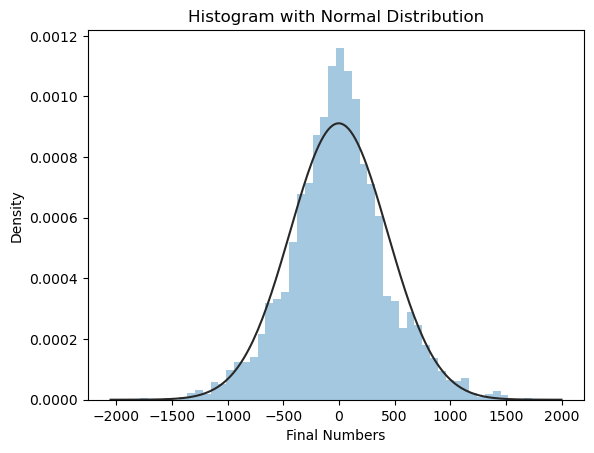

In [13]:
from scipy.stats import norm
sns.distplot(results_2024_1,norm_hist=True,kde=False,fit=norm)
plt.xlabel('Final Numbers')
plt.title('Histogram with Normal Distribution')
plt.ylabel('Density')
plt.show()

In [15]:
from scipy.stats import kstest, norm


data_normalized = (results_2024_1 - np.mean(results_2024_1)) / np.std(results_2024_1)
stat, p = kstest(data_normalized, 'norm')
print(f'Kolmogorov-Smirnov Test statistic={stat}, p-value={p}')


Kolmogorov-Smirnov Test statistic=0.04000724417588164, p-value=0.00013107758343186711


C:\Users\LuYi\AppData\Local\Temp\ipykernel_16512\1514290427.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results_2024_2,norm_hist=True,kde=False,fit=gamma)


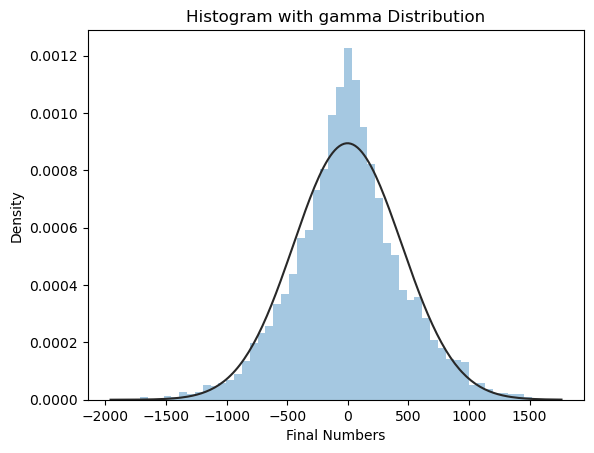

In [18]:
from scipy.stats import gamma
sns.distplot(results_2024_2,norm_hist=True,kde=False,fit=gamma)
plt.xlabel('Final Numbers')
plt.title('Histogram with gamma Distribution')
plt.ylabel('Density')
plt.show()

In [19]:
from scipy import stats

a, loc, scale = stats.gamma.fit(results_2024_1)

ks_statistic, p_value = stats.kstest(results_2024_1, 'gamma', args=(a, loc, scale))

print(f"K-S statistic: {ks_statistic}, P-value: {p_value}")

K-S statistic: 0.03678433022280736, P-value: 0.0005804260721313516
